In [75]:
# ! pip install requests
# ! pip install bs4
# ! pip install wikipedia 

In [76]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import wikipedia   # this package is used to fetch text data from wikipedia
import requests   # connect between python and a webserver 
from bs4 import BeautifulSoup  # parsing data and fetching from website
pd.set_option("display.max_colwidth", 999)

## Reading data from csv or tsv file 

In [77]:
os.chdir(r"D:\DL\NLP\NLP_Data_full")

In [78]:
os.listdir()

['data_v1.json',
 'imdb_top_250_movies.csv',
 'movie-train.tsv',
 'Project Data.zip',
 'sms.csv',
 'Test.csv',
 'Train.csv']

In [79]:
sms=pd.read_csv("sms.csv")

In [80]:
sms.head()

,Unnamed: 0,label,message
0,0,ham,"Go until jurong point, crazy Available only in bugis n great world la e buffet Cine there got amore wat"
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [81]:
sms.shape

(5572, 3)

In [82]:
sms.dtypes

Unnamed: 0     int64
label         object
message       object
dtype: object

In [83]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   label       5572 non-null   object
 2   message     5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


#### Read TSV file

In [84]:

movie=pd.read_csv("movie-train.tsv", sep="\t") #tsv - tab seperated value(tsv) '\t' 
movie

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


#### Reading wikipedia data 

In [85]:
wiki_obama=wikipedia.page("Indian Army").content
print(wiki_obama) 

The Indian Army is the land-based branch and the largest component of the Indian Armed Forces. The President of India is the Supreme Commander of the Indian Army, and its professional head is the Chief of Army Staff (COAS), who is a four-star general. Two officers have been conferred with the rank of field marshal, a five-star rank, which is a ceremonial position of great honour. The Indian Army was formed in 1895 alongside the long established presidency armies of the East India Company, which too were absorbed into it in 1903. The princely states had their own armies, which were merged into the national army after independence. The units and regiments of the Indian Army have diverse histories and have participated in several battles and campaigns around the world, earning many battle and theatre honours before and after Independence.The primary mission of the Indian Army is to ensure national security and national unity, to defend the nation from external aggression and internal thre

In [86]:
len(wiki_obama)

70303

In [87]:
from wordcloud import WordCloud

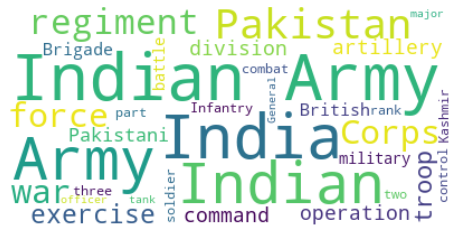

In [88]:
wordcloud = WordCloud(max_words=100,min_font_size=10,
                      background_color='white',
                      relative_scaling=0.5,
                      random_state=5).generate_from_text(wiki_obama)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Reading data from any website 

In [89]:
# This syntax is making connection with the given url
url="https://www.timesnownews.com/sports"
req=requests.get(url) 

In [90]:
req  # response [200] :request was successful / connection established 

<Response [200]>

In [91]:
# 100 : informational code indicates that the request is intiated by the browser in continues 
# 200 : successful connection
# 300 : Redirecting codes 
# 400 : Client error indicating that there was a problem with request
# 404 : not found : page is available or the server can not find the resources 
# etc...

In [92]:
# req.content

In [93]:
soup=BeautifulSoup(req.content, 'html.parser')

In [94]:
# soup

In [95]:
sports=[]
for i in soup.find_all("div", class_="undefined"):
        v=i.text
        sports.append(v)
sports  

['Players need to give more than 100% for India: Rohit Sharma gives honest reply on never-ending injury crisis',
 'Belgium star Eden Hazard quits international football',
 "Cryptos se bhi tez gir rahi...: Virender Sehwag gives no-nonsense verdict on India's defeat to Bangladesh",
 "'Would have helped others': Sunil Gavaskar feels Rohit Sharma should have made this move in 2nd ODI vs BAN",
 'Rohit Sharma braves injury; walks out to bat with bandaged thumb in 2nd ODI vs Bangladesh',
 'Another injury blow for India? Deepak Chahar bowls just 3 overs; not spotted fielding during 2nd ODI',
 'The moment Rohit Sharma injured himself! Indian skipper drops catch, hurts thumb vs Bangladesh - watch',
 'WATCH: Virat Kohli disappointed after low score in 2nd ODI vs Bangladesh; reaction goes viral',
 "Australia's Marnus Labuschagne overtakes Joe Root to take top spot in ICC Test rankings for batters",
 'Explained: Why Virat Kohli opened the batting for the first time in ODI cricket since 2014 in 2nd 

In [96]:
url1="https://www.timesnownews.com/viral"
req1=requests.get(url1)
soup1=BeautifulSoup(req1.content, 'html.parser')

In [97]:
viral=[]
for i in soup1.find_all("div", class_="undefined"):
    v=i.text
    viral.append(v)

In [98]:
viral

['Wordle 537 answer: Hints and clues to take another crack at Wordle today, December 8',
 'Heartwarming! Elderly couple tries to click selfie inside metro - Watch Viral Video',
 "Pregnant Canadian woman's Indian saas-sasur ask for iPhones, netizens say 'tell them you're craving for gold'",
 'How logical are you? Only 4 per cent people can solve this simple card test - can you?',
 'Stunning photo of Japanese beach where snow, sand and sea meet goes viral',
 'In this Kerala cinema hall, cinephiles and casual watchers will not get disturbed again by crying babies',
 'King Charles does namaste, sits on floor at gurudwara in England - See Viral Pictures',
 'Kerala Fifty Fifty FF27 lottery result, list of winners',
 "Japan coach's graceful bow after losing to Croatia is one of world cup's 'defining moments', netizens say",
 'Shillong Teer 7.12.2022 results today: Check first and second round numbers',
 'Construction worker transforms scooter into electric pulley; Anand Mahindra lauds his inn

In [99]:
url_business="https://www.timesnownews.com/business-economy"
business_req=requests.get(url_business)
business_req

<Response [200]>

In [100]:
bus=BeautifulSoup(business_req.content, 'html.parser')
bus

<!DOCTYPE html>
<html class="no-js" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=5.0" name="viewport"/><meta content="en" http-equiv="content-language"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="true" name="HandheldFriendly"/><meta content="width" name="MobileOptimized"/><meta content="yes" name="mobile-web-app-capable"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="TimesNow" property="og:site_name"/><meta content="summary_large_image" name="twitter:card"/><meta content="TIMESNOW" name="twitter:site"/><meta content="@TIMESNOW" property="twitter:creator"/><meta content="1280" property="og:image:width"/><meta content="720" property="og:image:height"/><meta content="#135394" name="theme-color"/><link href="https://www.timesnownews.com/tnnassets/im

In [104]:
bus=BeautifulSoup(business_req.content, 'html.parser')
business_new = []
for k in bus.find_all('div', class_='undefined'):
    y = k.text
    business_new.append(y)
business_new

['Vedantu sacks 385 employees in latest round of layoffs; over 1,100 employees this year',
 'Elon Musk briefly loses top spot on Forbes billionaire list',
 "Pursue ideas, build right team and develop perseverance: OYO's Ritesh Agarwal to budding entrepreneurs",
 'Small and micro enterprises need to leverage technologies to become leaders of tomorrow: V Vaidyanathan, MD & CEO, IDFC First Bank',
 'Wide spectrum of startup ecosystem points to vibrancy and potential of Indian economy: Times Network MD & CEO MK Anand',
 'Goldman Sachs plans to invest tens of millions of dollars in cryptocurrency firms',
 'How is e-Rupee different from UPI? RBI Governor explains the difference',
 'Indices extend losses as RBI says inflation battle to continue',
 "New UPI feature 'pivotal', puts NPCI payment system at par with credit cards: Industry leaders",
 "ET Now to host 10th season of 'Leaders of Tomorrow Awards' today",
 'Agriculture and silver are the most opportune trades: Jim Rogers',
 'Slack CEO to

In [ ]:
# business_new

In [105]:
bus1=pd.DataFrame(business_new, columns=["News"])

In [106]:
vir=pd.DataFrame(viral, columns=["News"])
sports=pd.DataFrame(sports, columns=["News"])

In [107]:
Final_news=pd.concat([bus1, vir])

In [108]:
Final_news

,News
0,"Vedantu sacks 385 employees in latest round of layoffs; over 1,100 employees this year"
1,Elon Musk briefly loses top spot on Forbes billionaire list
2,"Pursue ideas, build right team and develop perseverance: OYO's Ritesh Agarwal to budding entrepreneurs"
3,"Small and micro enterprises need to leverage technologies to become leaders of tomorrow: V Vaidyanathan, MD & CEO, IDFC First Bank"
4,Wide spectrum of startup ecosystem points to vibrancy and potential of Indian economy: Times Network MD & CEO MK Anand
...,...
16,UP man's 6-seater e-bike covers 150 km on single charge; Anand Mahindra says it can find 'global application'
17,Optical illusion: There is a hidden animal in the image. Can you spot it in 10 seconds?
18,"Viral video: Announcer suffers scary medical emergency live on air, fans pray for speedy recovery"
19,Zombie virus or drugs? People acting strange on the streets of Philadelphia shocks Twitter [WATCH video]


### Reading from Amazon

In [ ]:
# url="https://www.amazon.in/Redgear-Gaming-Semi-Honeycomb-Windows-Gamers/product-reviews/B08CHZ3ZQ7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2"
# amazon=requests.get(url)
# amazon

In [ ]:
# 503 : server is not ready to handle this request 

In [ ]:
# for i in soup.find_all("span"):
#     print(i)

In [109]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
 
 
# Downloading imdb top 250 movie's data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]

list = []

for index in range(0, len(movies)):
     
    # Separating movie into: 'place',
    # 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,
            "movie_title": movie_title,
            "rating": ratings[index],
            "year": year,
            "star_cast": crew[index],
            }
    list.append(data)
 
# printing movie details with its rating.
for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'] +
        ') -', 'Starring:', movie['star_cast'], movie['rating'])
 
 
##.......##
df = pd.DataFrame(list)
df.to_csv('imdb_top_250_movies.csv',index=False)

1 - The Shawshank Redemption (1994) - Starring: Frank Darabont (dir.), Tim Robbins, Morgan Freeman 9.235267624242587
2 - The Godfather (1972) - Starring: Francis Ford Coppola (dir.), Marlon Brando, Al Pacino 9.156089803395421
3 - The Dark Knight (2008) - Starring: Christopher Nolan (dir.), Christian Bale, Heath Ledger 8.989428384379405
4 - The Godfather Part II (1974) - Starring: Francis Ford Coppola (dir.), Al Pacino, Robert De Niro 8.984063510889056
5 - 12 Angry Men (1957) - Starring: Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb 8.950949531445348
6 - Schindler's List (1993) - Starring: Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes 8.938178715974392
7 - The Lord of the Rings: The Return of the King (2003) - Starring: Peter Jackson (dir.), Elijah Wood, Viggo Mortensen 8.928787177181105
8 - Pulp Fiction (1994) - Starring: Quentin Tarantino (dir.), John Travolta, Uma Thurman 8.84827242013039
9 - The Lord of the Rings: The Fellowship of the Ring (2001) - Starring: Peter Jackson (di

In [110]:
df

,place,movie_title,rating,year,star_cast
0,1,The Shawshank Redemption,9.235267624242587,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Freeman"
1,2,The Godfather,9.156089803395421,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al Pacino"
2,3,The Dark Knight,8.989428384379405,2008,"Christopher Nolan (dir.), Christian Bale, Heath Ledger"
3,4,The Godfather Part II,8.984063510889056,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert De Niro"
4,5,12 Angry Men,8.950949531445348,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb"
...,...,...,...,...,...
245,246,Dersu Uzala,8.008085133966613,1975,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy Solomin"
246,247,Aladdin,8.005273961532033,1992,"Ron Clements (dir.), Scott Weinger, Robin Williams"
247,248,The Iron Giant,8.005208483410456,1999,"Brad Bird (dir.), Eli Marienthal, Harry Connick Jr."
248,249,The Help,8.005082052492632,2011,"Tate Taylor (dir.), Viola Davis, Emma Stone"


In [111]:
url = "https://www.timesnownews.com/"
response = requests.get(url)
data = response.text
soup = BeautifulSoup(data,'html.parser')
tags = soup.find_all('a')
for tag in tags:
    print(tag.get('href'))


https://www.facebook.com/Timesnow
https://twitter.com/timesnow
https://www.instagram.com/timesnow
/
/
/latest-news
/elections
/india
/business-economy
/education
/entertainment-news
/viral
/sports
/health
/videos
/cryptonow
/live-tv
None
None
/elections/gujarat-election-results-2022-live-updates-aap-bjp-congress-vote-counting-result-liveblog-96059370
/elections/himachal-pradesh-election-results-2022-live-updates-aap-bjp-congress-vote-counting-result-liveblog-96059149
/elections/gujarat-election-results-winners-list-article-96071218
/elections/himachal-pradesh-assembly-election-results-2022-won-lost-leading-and-trailing-candidates-article-96070701
/elections/delhi-mcd-election-2022-results-check-full-list-of-ward-wise-winners-article-96042517
/elections/gujarat-election
/elections/gujarat-election
/elections/gujarat-election
/elections/gujarat-election
/elections/gujarat-election/key-candidates
/elections/gujarat-election/constituency-wise-result
/elections/himachal-pradesh-election
/el

In [112]:
page=["latest-news","elections","india","business-economy","education"
,"entertainment-news","viral","sports","health","videos","cryptonow","live-tv"]

myurl=[]
ur="https://www.timesnownews.com"
for i in page:
    myurl.append(ur+"/"+str(i))

In [113]:
my_new=[]
for j in myurl:
    business_req=requests.get(url_business)
    bus=BeautifulSoup(business_req.content, 'html.parser')
    for k in bus.find_all("div", class_="undefined"):
        y=k.text
        my_new.append(y)
    

In [114]:
len(my_new)

504

In [115]:
from bs4 import BeautifulSoup
import requests 


url = "https://www.timesnownews.com/"


response = requests.get(url)


#print(response)


data = response.text


soup = BeautifulSoup(data,'html.parser')


jobs = soup.find_all('a',{'class':'href'})


for job in jobs:
    title = job.find('div',{'class':'undefined'}).text
    
    print('Job Title:', title, '\n---')


In [116]:
import requests
from bs4 import BeautifulSoup
from lxml import etree as et
import time
import random
import json
from unidecode import unidecode
start_url = "https://www.imdb.com/chart/top" #request
header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36"}
movie_urls = []

In [117]:
response = requests.get(start_url, headers=header) #explain beautfiful soup and etree
soup = BeautifulSoup(response.content, 'html.parser')
dom = et.HTML(str(soup))
movie_urls_list = dom.xpath('//td[@class="titleColumn"]/a/@href')

In [118]:
for i in movie_urls_list:
    long_url = "https://www.imdb.com" + i
    short_url = long_url.split("?")[0]
    movie_urls.append(short_url)

In [119]:
def time_delay():
    time.sleep(random.randint(2, 5))

In [120]:
with open("data_v1.json", "w") as f:
    json.dump([], f)

def write_to_json(new_data, filename='data_v1.json'):
    with open(filename, 'r+') as file:
        file_data = json.load(file)
        file_data.append(new_data)
        file.seek(0)
        json.dump(file_data, file, indent=4)

In [121]:
for movie_url in movie_urls:
    response = requests.get(movie_url, headers=header)
    soup = BeautifulSoup(response.content, 'html.parser')
    dom = et.HTML(str(soup))

    rank = movie_urls.index(movie_url) + 1
    movie_name = dom.xpath('//h1[@data-testid="hero-title-block__title"]/text()')[0]
    movie_year = dom.xpath('//a[@class="ipc-link ipc-link--baseAlt ipc-link--inherit-color sc-8c396aa2-1 WIUyh"]/text()')[0]
    genre = dom.xpath('//span[@class="ipc-chip__text"]/text()')
    director_name = dom.xpath('//a[@class="ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"]/text()')[0]
    rating = dom.xpath('//span[@class="sc-7ab21ed2-1 jGRxWM"]/text()')[0]
    actors_list = dom.xpath('//a[@data-testid="title-cast-item__actor"]/text()')
    actors_list = [unidecode(i) for i in actors_list]

    write_to_json({'rank': rank,
                   'movie_name': movie_name,
                   'movie_url': movie_url,
                   'movie_year': movie_year,
                   'genre': genre,
                   'director_name': unidecode(director_name),
                   'rating': rating,
                   'actors': actors_list})

    time_delay()
    print("{}% data is written to json file".format(round((rank * 100) / len(movie_urls))),2)

0% data is written to json file 2
1% data is written to json file 2
1% data is written to json file 2
2% data is written to json file 2
2% data is written to json file 2
2% data is written to json file 2
3% data is written to json file 2
3% data is written to json file 2
4% data is written to json file 2
4% data is written to json file 2
4% data is written to json file 2
5% data is written to json file 2
5% data is written to json file 2
6% data is written to json file 2
6% data is written to json file 2
6% data is written to json file 2
7% data is written to json file 2
7% data is written to json file 2
8% data is written to json file 2
8% data is written to json file 2
8% data is written to json file 2
9% data is written to json file 2
9% data is written to json file 2
10% data is written to json file 2
10% data is written to json file 2
10% data is written to json file 2
11% data is written to json file 2
11% data is written to json file 2
12% data is written to json file 2
12% data